<a href="https://colab.research.google.com/github/Aluphony/CreditCardFraud/blob/main/CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv('creditcard.csv')
df.shape

(17918, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,13905.276259,-0.244970,0.258166,0.777804,0.291614,-0.146329,0.099878,-0.150970,0.012969,0.734707,...,-0.052197,-0.146256,-0.038504,0.014510,0.119974,0.036454,0.014558,0.007047,67.504000,0.004521
std,9867.916251,1.893161,1.508296,1.766872,1.479519,1.423917,1.327756,1.342027,1.318460,1.273597,...,0.826158,0.634077,0.526168,0.588938,0.438850,0.537046,0.397673,0.248679,189.184677,0.067087
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.687773,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3781.250000,-0.959806,-0.305367,0.338327,-0.629972,-0.729796,-0.651820,-0.599770,-0.175261,-0.102798,...,-0.262581,-0.556175,-0.173509,-0.330602,-0.140146,-0.345451,-0.071486,-0.011786,5.490000,0.000000
50%,12347.500000,-0.306803,0.235061,0.924255,0.230058,-0.192681,-0.169764,-0.076457,0.020846,0.726588,...,-0.119493,-0.118803,-0.046656,0.063623,0.158356,-0.030200,0.003094,0.018529,15.950000,0.000000
75%,23775.000000,1.164015,0.876538,1.557391,1.155770,0.347812,0.493661,0.447398,0.272076,1.480254,...,0.041561,0.250886,0.072758,0.398391,0.397765,0.342446,0.098968,0.077345,56.670000,0.000000
max,29031.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [10]:
df.duplicated().sum()

55

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(17863, 31)

In [13]:
df['Class'].unique()

array([ 0.,  1., nan])

In [14]:
df['Class'].value_counts()

Class
0.0    17781
1.0       81
Name: count, dtype: int64

In [15]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
normal_percentage = len(normal)/(len(fraud)+len(normal))
fraud_percentage = len(fraud)/(len(fraud)+len(normal))
print('Percentage of fraud transactions = ', round(fraud_percentage * 100, 3))
print('Percentage of normal transactions = ', round(normal_percentage * 100, 3))

Percentage of fraud transactions =  0.453
Percentage of normal transactions =  99.547


VISUALIZATION


<ipython-input-73-ca6c10cc3f6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Class',palette=['green','red'])


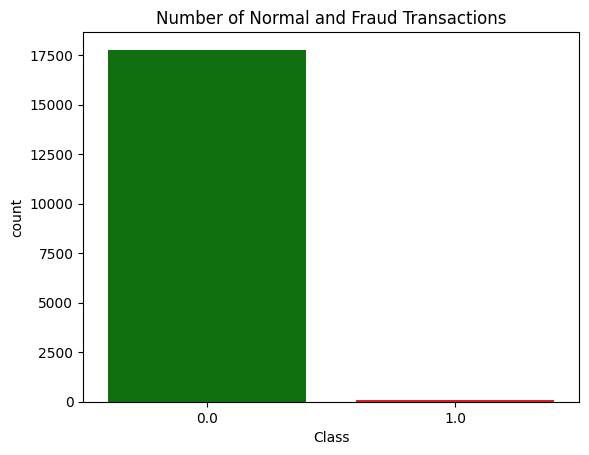

In [73]:
plt.figure()
sns.countplot(data=df,x='Class',palette=['green','red'])
plt.title("Number of Normal and Fraud Transactions");

<Figure size 640x480 with 0 Axes>

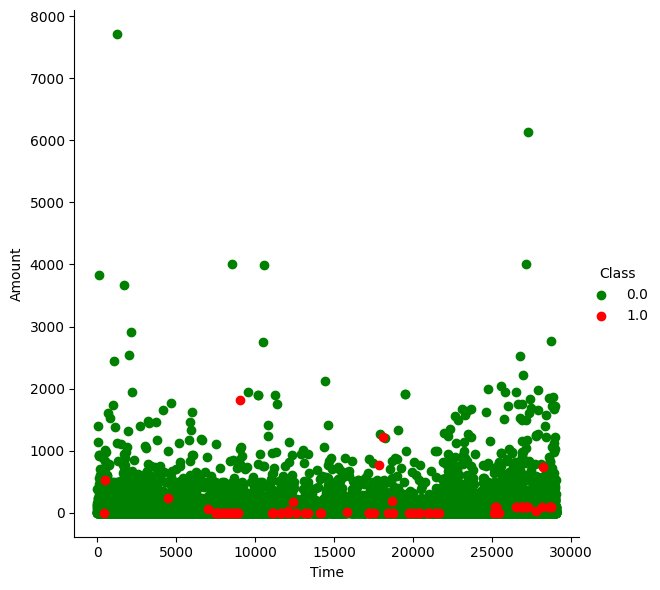

In [22]:
plt.figure()
sns.FacetGrid(df, hue="Class", height=6,palette=['green','red']).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

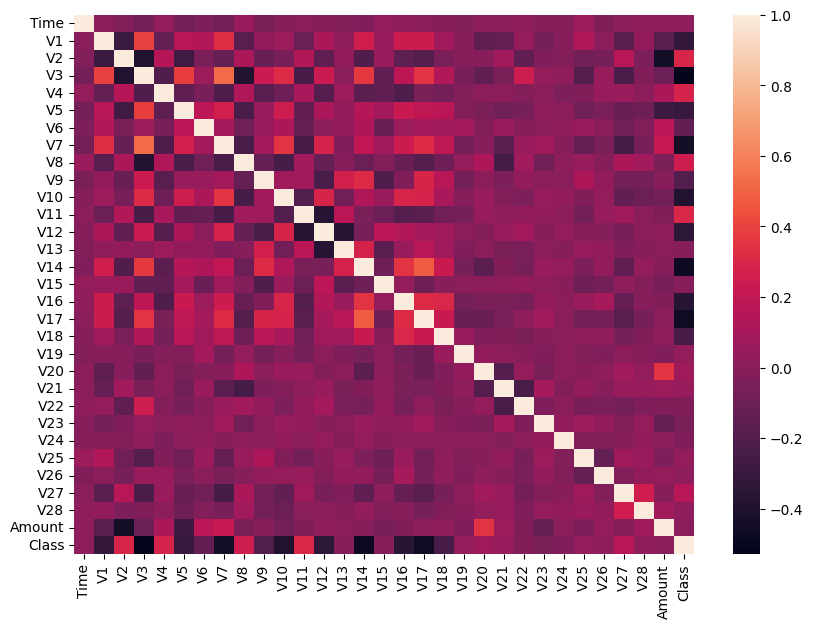

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr())
plt.show()

In [26]:
X = df.drop('Class',axis=1)
y = df['Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

MODELLING

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [36]:
def model_train_test(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print('Accuracy = {}'.format(accuracy_score(y_test,prediction)))
    print(classification_report(y_test,prediction))
    matrix = confusion_matrix(y_test,prediction)
    dis = ConfusionMatrixDisplay(matrix)
    dis.plot()
    plt.show()

In [40]:
 rf_model = RandomForestClassifier()

In [44]:
imputer = SimpleImputer(strategy='mean')

In [52]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [54]:
if np.any(pd.isnull(y_train)):
    y_imputer = SimpleImputer(strategy='most_frequent')  # or choose an appropriate strategy
    y_train = y_imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [56]:
rf_model.fit(X_train_imputed, y_train)

RandomForestClassifier()

Accuracy = 0.9990669901100951
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5328
         1.0       1.00      0.84      0.91        31

    accuracy                           1.00      5359
   macro avg       1.00      0.92      0.96      5359
weighted avg       1.00      1.00      1.00      5359



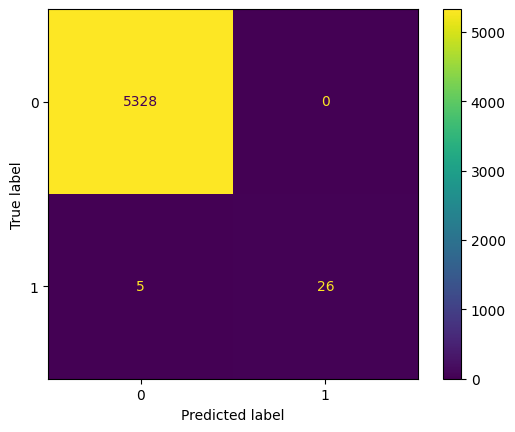

In [58]:
model_train_test(rf_model,X_train_imputed,y_train,X_test_imputed,y_test)

In [61]:
Decision_tree = DecisionTreeClassifier()

Accuracy = 0.9985071841761523
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5328
         1.0       0.90      0.84      0.87        31

    accuracy                           1.00      5359
   macro avg       0.95      0.92      0.93      5359
weighted avg       1.00      1.00      1.00      5359



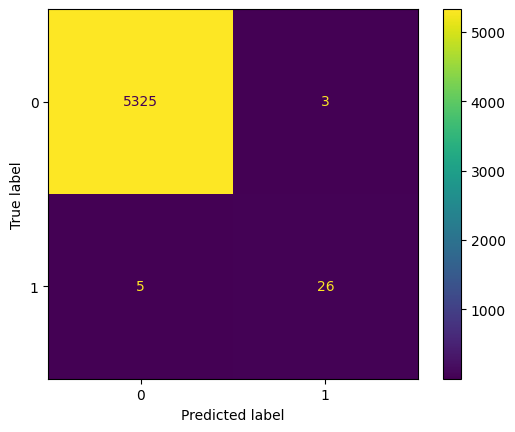

In [63]:
model_train_test(Decision_tree,X_train_imputed,y_train,X_test_imputed,y_test)